In [1]:
using Pkg
Pkg.add("WebIO")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [4]:
using WebIO
using IJulia
include("GA.jl")
include("plottingUtils.jl")
include("roadNetwork.jl")

In [3]:
boundary1(x) = 0
boundary2(x) = 13
# boundary1(x) = sin(x+12)+4
# boundary2(x) = sin(x+4)+12
o1 = Circle(1,Point(5,10))
o2 = Circle(1.2,Point(10,7))
o3 = Circle(0.8,Point(7,6))
o4 = Circle(0.8,Point(12,8))
# o2 = Rectangle(3,2,Point(10,7))
start_point = Point(0,10)
goal_point = Point(19,5.2)

road = Road(boundary1,boundary2,[o1,o2,o3,o4])
# road = Road(boundary1,boundary2,[])

Road(boundary1, boundary2, Obstacle[Circle(1, Point(5, 10)), Circle(1.2, Point(10, 7)), Circle(0.8, Point(7, 6)), Circle(0.8, Point(12, 8))])

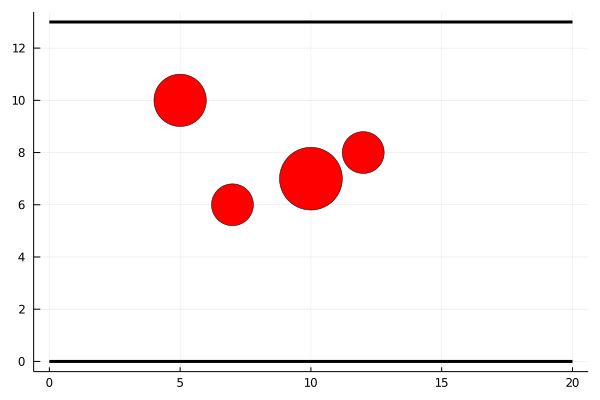

In [8]:
gr()

draw_road(road,0,20)

In [9]:
circle = Circle(1,Point(5,10))
test_curve = BezierCurve([Point(2,9),Point(6,11)])
test_curve = BezierCurve([Point(0, 10), Point(9.792786584297819, 12.404595735445575), Point(19, 9)])

3-element Array{Point,1}:
 Point(0, 10)
 Point(9.792786584297819, 12.404595735445575)
 Point(19, 9)

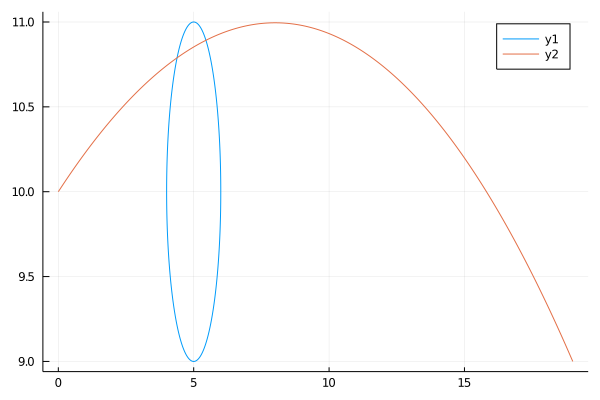

In [10]:
plt = plot(get_circle(circle))
plot!(plt,get_curve(test_curve))

In [11]:
curve_values = get_curve(test_curve)
i = findall(x -> x==4,curve_values[1])
@show i
curve_values[2][i]

i = Int64[]


Any[]

In [12]:
circle_values = get_circle(circle)
is = findall(x -> round(x,digits=2) == 4.00,circle_values[1])
# filter(x -> x<4.1,circle_values[1])

16-element Array{Int64,1}:
 243
 244
 245
 246
 247
 248
 249
 250
 251
 252
 253
 254
 255
 256
 257
 258

In [13]:
circ_intersects = []
for i in is
    if round(circle_values[2][i],digits=1) == curve_values[2][251]
        append!(circ_intersects,[i])
    end
end
circ_intersects

Any[]

In [14]:
intersects = []
for i in 1:length(curve_values[1])
    x = curve_values[1][i]
    y = curve_values[2][i]
    potential_intersect_circle_is = findall(cx -> round(cx,digits=1)==round(x,digits=1),circle_values[1])
    for j in potential_intersect_circle_is
        if round(y,digits=1) == round(circle_values[2][j],digits=1)
            append!(intersects,[(x,y)])
        end
    end
end
@show intersects

infeasbile_d = √((intersects[1][1]-intersects[end][1])^2 + (intersects[1][2] - intersects[end][2])^2)


intersects = Any[(4.280484355731011, 10.776857256404922), (4.280484355731011, 10.776857256404922), (4.319137855387164, 10.781340314086437), (4.319137855387164, 10.781340314086437), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.43507024684353, 10.794510645940377), (4.43507024684353, 10.794510645940377), (

1.2404460658997665

In [23]:
include("GA.jl")
include("roadNetwork.jl")
include("plottingUtils.jl")
P = GA(start_point,goal_point,road,1,20);

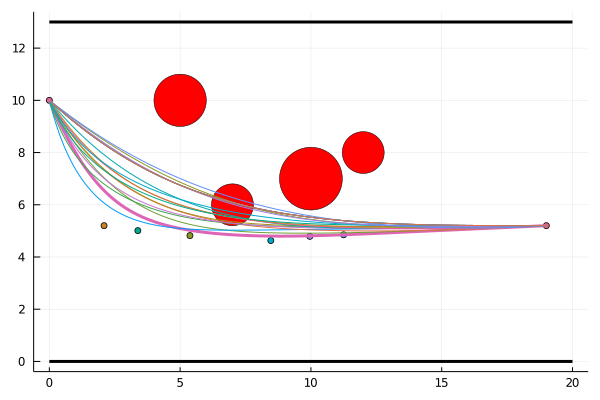

In [29]:
plotGeneration!(draw_road(road,0,20),P,road)

# map(i->isFeasible(road,i),P)

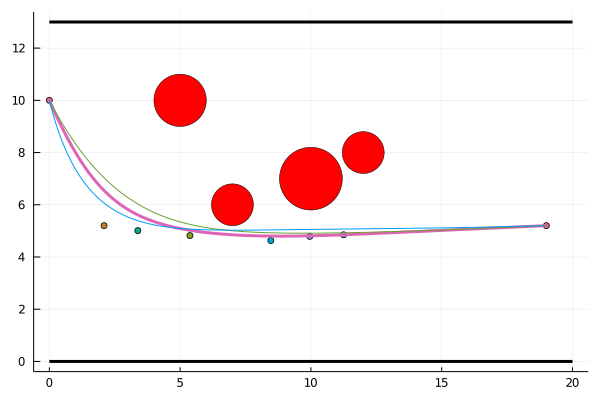

In [35]:
P_valid = filter(i -> infeasible_distance(road,i.phenotype.genotype)==0,P)
plotGeneration!(draw_road(road,0,20),P_valid,road)  

This is what the generated routes look like after all infeasible and uncomfortably close routes are filtered out 

In [18]:
plotGeneration!(draw_road(road,0,20),filter(i->high_proximity_distance(road,i.phenotype.genotype)==0,filter(i -> infeasible_distance(road,i.phenotype.genotype)==0,P)))


LoadError: UndefVarError: P not defined

In [19]:
best = P[1].fitness

LoadError: UndefVarError: P not defined

In [20]:
optimal = √((start_point.x - goal_point.x)^2 + (start_point.y - goal_point.y)^2)

19.596938536414303

In [21]:
(best/optimal-1)*100

LoadError: UndefVarError: best not defined

In [22]:
filter(i-> high_proximity_distance(road,i.phenotype.genotype)==0 ∘ i->infeasible_distance(road,i.phenotype.genotype)==0,P)

LoadError: UndefVarError: P not defined

In [23]:
function plotObstacles(road)
    plt = plot()
    for o in road.obstacles
        plot!(plt,get_circle(o), seriestype=[:shape],legend=false )
    end
    plt
end

plotObstacles (generic function with 1 method)

In [24]:
include("plottingUtils.jl")
# plt =plotObstacles(road)
# plotGeneration!(plt,P)

plot_control_points! (generic function with 1 method)

In [25]:
include("roadNetwork.jl")
include("utils.jl")

c = BezierCircle()
# x = BezierCurve([Point(0,1)])


LoadError: UndefVarError: BezierCircle not defined

In [26]:
circ = Circle(1,Point(0,0))

Circle(1, Point(0, 0))

In [27]:
circ(π)
# c(0.5)

(-1.0, 1.2246467991473532e-16)

In [28]:
plot_curve(c,100)

LoadError: UndefVarError: c not defined

In [29]:
c = (4/3)*(√(2)-1)
c1 = BezierCurve([Point(0,1),Point(c,1),Point(1,c),Point(1,0)])
c2 = BezierCurve([Point(1,0),Point(1,-c),Point(c,-1),Point(0,-1)])
c3 = BezierCurve([Point(0,-1),Point(-c,-1),Point(-1,-c),Point(-1,0)])
c4 = BezierCurve([Point(-1,0),Point(-1,c),Point(-c,1),Point(0,1)])

4-element Array{Point,1}:
 Point(-1, 0)
 Point(-1, 0.5522847498307935)
 Point(-0.5522847498307935, 1)
 Point(0, 1)

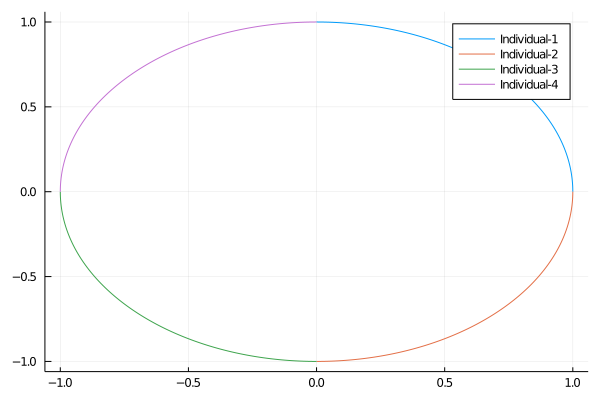

In [30]:
plt = plot()
plot_curve!(plt,1,c1,100)
plot_curve!(plt,2,c2,100)
plot_curve!(plt,3,c3,100)
plot_curve!(plt,4,c4,100)


In [31]:
include("FitnessLandscape.jl")
fitness_landscape(road,Fitness,(start_point.x,goal_point.x),(start_point.y,goal_point.y))

LoadError: could not open file /home/sam/git-clones/Y4-Diss/code/classical/julia/FitnessLandscape.jl

In [32]:
xs = Array(range(0,4,step=0.2))
ys = Array(range(2,5,step=0.2))


16-element Array{Float64,1}:
 2.0
 2.2
 2.4
 2.6
 2.8
 3.0
 3.2
 3.4
 3.6
 3.8
 4.0
 4.2
 4.4
 4.6
 4.8
 5.0